In [18]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import LeakyReLU

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

In [3]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
x_train[0].shape

(28, 28)

In [5]:
print(28*28)
print(len(x_train))

784
60000


In [6]:
x_train_flatten=x_train.reshape(len(x_train),784)
x_test_flatten=x_test.reshape(len(x_test),784)
x_train_flatten=x_train_flatten/255
x_test_flatten=x_test_flatten/255

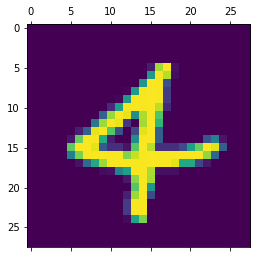

In [7]:
plt.matshow(x_train[150])

In [25]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(50,input_shape=(784,),activation=LeakyReLU(alpha=0.1)),
    keras.layers.Dense(20,input_shape=(784,),activation='LeakyReLU'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [26]:
model.fit(x_train_flatten,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1335 - accuracy: 0.9606
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1193 - accuracy: 0.9653
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1082 - accuracy: 0.9677
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0986 - accuracy: 0.9706
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0907 - accuracy: 0.9729
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0829 - accuracy: 0.9762
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0760 - accuracy: 0.9780
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0705 - accuracy: 0.9796
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0651 - accuracy: 0.9803
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.060

In [14]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2257 - accuracy: 0.9350


[0.22567982971668243, 0.9350000023841858]

In [15]:
y_predicted=model.predict(x_test_flatten)
y_predicted[0]

313/313 [==============================] - 1s 1ms/step


array([5.1564395e-01, 2.8296721e-03, 6.7339444e-01, 9.4710273e-01,
       4.2627659e-02, 3.8313964e-01, 4.7663631e-04, 9.9992353e-01,
       1.8872516e-01, 8.8289565e-01], dtype=float32)

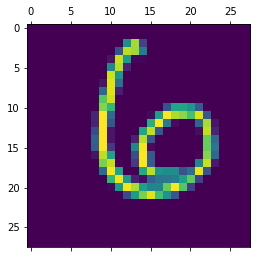

In [16]:
plt.matshow(x_test[100])

In [17]:
np.argmax(y_predicted[100])

6

In [18]:
y=[np.argmax(i) for i in y_predicted]
y[:5]

[7, 2, 1, 0, 4]